In [2]:
import pandas as pd
import glob

In [82]:
for fname in glob.glob("../derived_timeseries/*call*sol*"):
    df = pd.read_json(fname)
    if "sharePrices" in fname:
        specialdf = df
    if "pricesByCoingeckoId" in fname:
        pricedf = df
    print(fname)
    print(df)

../derived_timeseries/mainnet_income_call_sol_sharePricesByGlobalId.json
                0        1
0   1641536266000  1.03765
1   1641545641000  1.01911
2   1641546894000  1.03708
3   1642123494000  1.04513
4   1642149147000  1.04444
5   1642485009000  1.05342
6   1642754276000  1.05252
7   1643341935000  1.05870
8   1643357725000  0.91597
9   1643358909000  1.05809
10  1643953401000  1.06779
11  1643962543000  1.06682
12  1644553067000  1.06967
13  1644566731000  1.01008
14  1644567419000  1.06939
15  1645167845000  1.07281
16  1645172127000  1.07246
17  1645745255000  1.07944
18  1645755851000  1.07874
19  1646358254000  1.08401
20  1646361093000  1.08348
21  1646962990000  1.08905
22  1646965811000  1.08849
23  1647556066000  1.09476
24  1647569874000  1.07621
25  1647570742000  1.09413
../derived_timeseries/mainnet_income_call_sol_depositTokenByGlobalId.json
                  0              1
0     1641159136000   84034.999963
1     1641159822000   84041.775963
2     1641160473000

In [83]:
specialdf["time"] = pd.to_datetime(specialdf[0], unit='ms')

<AxesSubplot:xlabel='time'>

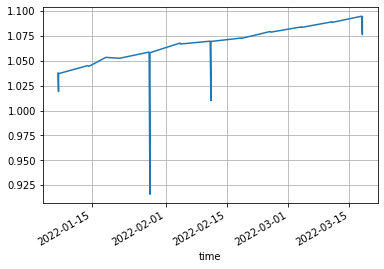

In [84]:
specialdf.set_index("time")[1].plot(grid=True)

In [85]:
# Yield Earned in BTC
# Yield Earned in USDC (USD value of all BTC yield earned) (Is this even valuable?)
# Total portfolio value in BTC
# Total portfolio value in USDC

In [92]:
specialdf["prev_change"] = specialdf[1]-specialdf[1].shift(1)

In [93]:
specialdf["next_time"] = (specialdf.time.shift(-1)-specialdf.time).dt.total_seconds()

In [94]:
specialdf

,0,1,time,next_time,prev_change
0,1641536266000,1.03765,2022-01-07 06:17:46,9375.0,NaN
1,1641545641000,1.01911,2022-01-07 08:54:01,1253.0,-0.01854
2,1641546894000,1.03708,2022-01-07 09:14:54,576600.0,0.01797
3,1642123494000,1.04513,2022-01-14 01:24:54,25653.0,0.00805
4,1642149147000,1.04444,2022-01-14 08:32:27,335862.0,-0.00069
5,1642485009000,1.05342,2022-01-18 05:50:09,269267.0,0.00898
6,1642754276000,1.05252,2022-01-21 08:37:56,587659.0,-0.00090
7,1643341935000,1.05870,2022-01-28 03:52:15,15790.0,0.00618
8,1643357725000,0.91597,2022-01-28 08:15:25,1184.0,-0.14273
9,1643358909000,1.05809,2022-01-28 08:35:09,594492.0,0.14212


In [95]:
shareprices = specialdf.loc[~((specialdf.prev_change.abs()>0.01)&(specialdf.next_time < 4000))]

In [96]:
qf = shareprices.join(pricedf, on=0, lsuffix="share", rsuffix="price")

In [97]:
qq = pd.merge_asof(shareprices, pricedf, direction='forward', left_on=0, right_on=0)

In [107]:
qq["usdc_value"] = qq["1_x"]*qq["1_y"]

In [108]:
qq

,0,1_x,time,next_time,prev_change,1_y,usdc_value
0,1641536266000,1.03765,2022-01-07 06:17:46,9375.0,NaN,139.11,144.347492
1,1641546894000,1.03708,2022-01-07 09:14:54,576600.0,0.01797,140.66,145.875673
2,1642123494000,1.04513,2022-01-14 01:24:54,25653.0,0.00805,147.39,154.041711
3,1642149147000,1.04444,2022-01-14 08:32:27,335862.0,-0.00069,146.41,152.916460
4,1642485009000,1.05342,2022-01-18 05:50:09,269267.0,0.00898,139.22,146.657132
5,1642754276000,1.05252,2022-01-21 08:37:56,587659.0,-0.00090,126.33,132.964852
6,1643341935000,1.05870,2022-01-28 03:52:15,15790.0,0.00618,92.57,98.003859
7,1643358909000,1.05809,2022-01-28 08:35:09,594492.0,0.14212,89.71,94.921254
8,1643953401000,1.06779,2022-02-04 05:43:21,9142.0,0.00970,104.77,111.872358
9,1643962543000,1.06682,2022-02-04 08:15:43,590524.0,-0.00097,105.63,112.688197


<AxesSubplot:xlabel='time'>

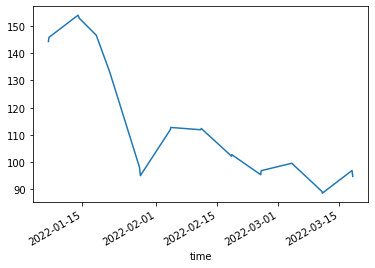

In [109]:
qq.set_index("time").usdc_value.plot()

<AxesSubplot:xlabel='time'>

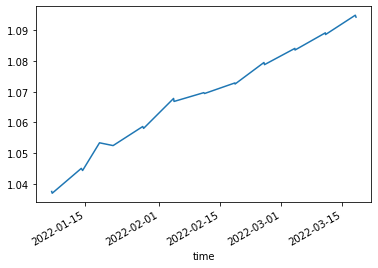

In [111]:
qq.set_index("time")["1_x"].plot()

In [65]:
qf["0share"].ffill()

0     1641536266000
1     1641546894000
2     1642130195000
3     1642151754000
4     1642727350000
6     1642755164000
7     1643338442000
8     1643358909000
9     1643952710000
11    1643963611000
12    1644542172000
13    1644547307000
15    1645152490000
16    1645745748000
18    1645758302000
20    1646362499000
21    1646963911000
22    1646973520000
23    1647556453000
25    1647572397000
Name: 0share, dtype: int64

## 

1. clean share price with px move before and timing next row. 
2. Join share price with coingecko price data
3. Figure out deposit and Withdrawal times for share price. (Pending deposit/withdrawal vs. actual deposit/withdrawal) may need to hardcode actual deposit/withdrawal times. 